# Advanced Machine Learning
## Lab 11: Feature Selection
### By: Amir Ali

>## Task 1

### Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Generate Dataset

In [3]:
def generate_dataset_1(n: int=500, p: int=50, k: int=10):
    X = np.random.normal(size=(n, p))
    chi_median = k * (1 - 2 / (9 * k)) ** 3
    y = [(1 if np.sum(row[:k] ** 2) > chi_median else 0) for row in X]
    return X, y

In [5]:
X_1, y_1 = generate_dataset_1()

In [6]:
def generate_dataset_2(n: int=500, p: int=50, k: int=10):
    X = np.random.normal(size=(n, p))
    y = [(1 if np.sum(np.abs(row[:k])) > k else 0) for row in X]
    return X, y

In [7]:
X_2, y_2 = generate_dataset_2()

>## Task 2

### 1. Feature Selection Based on Random Forest
Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [10]:
from sklearn.ensemble import RandomForestClassifier

#### Dataset 1

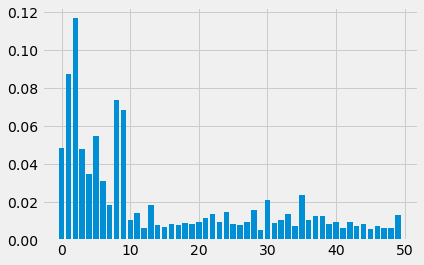

In [13]:
rf1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 0)
rf1.fit(X_1, y_1)
importance = rf1.feature_importances_
plt.bar([x for x in range(len(importance))], importance)
plt.show()

#### Dataset 2

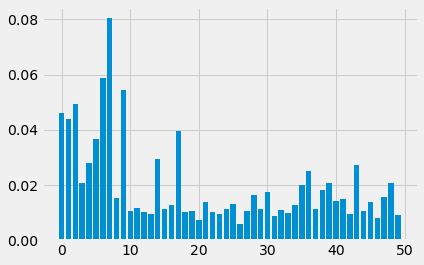

In [14]:
rf2 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
rf2.fit(X_2, y_2)
importance_2 = rf2.feature_importances_
plt.bar([x for x in range(len(importance_2))], importance_2)
plt.show()

### 2. Features Selection Based on Boruta algorithm
Reference: https://github.com/scikit-learn-contrib/boruta_py

In [16]:
from boruta import BorutaPy

#### Dataset 2

In [27]:
# define Boruta feature selection method
feat_selector = BorutaPy(rf1, n_estimators='auto', verbose=2, random_state=1)

In [28]:
feat_selector.fit(X_1, y_1)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	38
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	38
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	38
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	38
Iteration: 	12 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	38
Iteration: 	13 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	38
Iteration: 	14 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	38
Iteration: 	15 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	38
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	38
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=97, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x23E723D5240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23E723D5240, verbose=2)

In [29]:
feat_selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [30]:
feat_selector.ranking_

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, 27,  9, 38,  4, 18, 23, 21,
       13, 24, 14, 16, 34,  7, 18, 22, 35, 16,  9, 20, 41,  2, 40,  7,  6,
       38,  3, 31, 33, 12, 38, 16, 30, 27, 36, 24, 11, 27, 32, 29,  5])

#### Dataset 2

In [31]:
feat_selector.fit(X_2, y_2)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	36
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	12
Rejected: 	36
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	12
Rejected: 	36
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	12
Rejected: 	36
Iteration: 	12 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	37
Iteration: 	13 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	37
Iteration: 	14 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	37
Iteration: 	15 / 100
Confirmed: 	4
Tentative: 	9
Rejected: 	37
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	8
Rejected: 	

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=97, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x23E723D5240),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x23E723D5240, verbose=2)

In [32]:
feat_selector.support_

array([ True,  True,  True, False,  True,  True,  True,  True, False,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [33]:
feat_selector.ranking_

array([ 1,  1,  1,  5,  1,  1,  1,  1,  2,  1, 41, 25, 33, 38,  1, 29, 29,
        1, 31, 20, 17, 33, 25, 39, 29, 22, 17, 15,  7, 36, 35, 23, 21, 27,
       37,  6,  4, 40,  9, 14, 11, 17, 19, 11, 31, 10, 23,  8,  3, 13])

### 3. Experiment with different values of n and p values

### 1)

In [34]:
# Try different values of n, p and k. First, you can use values: n = 500, p = 50 and k = 10.
n = 500
p = 50
ks = [5, 10, 25]

In [37]:
importances_1, importances_2 = [], []
rankings_1, rankings_2 = [], []
for k in ks:
    X_1, y_1 = generate_dataset_1(n=n, p=p, k=k)
    X_2, y_2 = generate_dataset_2(n=n, p=p, k=k)
    # classifiers
    rf1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
    rf1.fit(X_1, y_1)
    rf2 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
    rf2.fit(X_2, y_2)
    
    # Random Forests
    importance_1 = rf1.feature_importances_
    importances_1.append(importance_1)
    importance_2 = rf2.feature_importances_
    importances_2.append(importance_2)
    
    # Boruta
    feat_selector1 = BorutaPy(rf1, n_estimators='auto', verbose=2, random_state=47)
    feat_selector2 = BorutaPy(rf2, n_estimators='auto', verbose=2, random_state=47)
    
    feat_selector1.fit(X_1, y_1)
    feat_selector2.fit(X_2, y_2)
    
    rankings_1.append(feat_selector1.ranking_)
    rankings_2.append(feat_selector2.ranking_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	4
Rejected: 	41
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	3
Rejected: 	42
I

Iteration: 	31 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	42
Iteration: 	32 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	42
Iteration: 	33 / 100
Confirmed: 	6
Tentative: 	2
Rejected: 	42
Iteration: 	34 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	35 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	36 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	37 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	38 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	39 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	40 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	41 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	42 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	43 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	44 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	45 / 100
Confirmed: 	6
Tentative: 	1
Rejected: 	43
Iteration: 	46 / 100
Confirmed: 	6
Tentative: 	1
Reject

Iteration: 	82 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	83 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	84 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	85 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	86 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	87 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	88 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	89 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	90 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	91 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	92 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	93 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	94 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	95 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	96 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	97 / 100
Confirmed: 	11
Tent

Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	12 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	13 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	14 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	15 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	16 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	17 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	18 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	19 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	20 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	21 / 100
Confirmed: 	6
Tentative: 	13
Rejected: 	31
Iteration: 	22 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	31
Iteration: 	23 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	31
Iteration: 	24 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	31
Iteration: 	25 / 100
Confirmed: 	7
Tentative: 	12
Rejected: 	31
Iteration: 	26 / 100
Confirmed: 	8
Tenta

Iteration: 	41 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	42 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	43 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	44 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	45 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	46 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	47 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	48 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	49 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	50 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	51 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	52 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	53 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	54 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	55 / 100
Confirmed: 	2
Tentative: 	2
Rejected: 	46
Iteration: 	56 / 100
Confirmed: 	2
Tentative: 	2
Reject

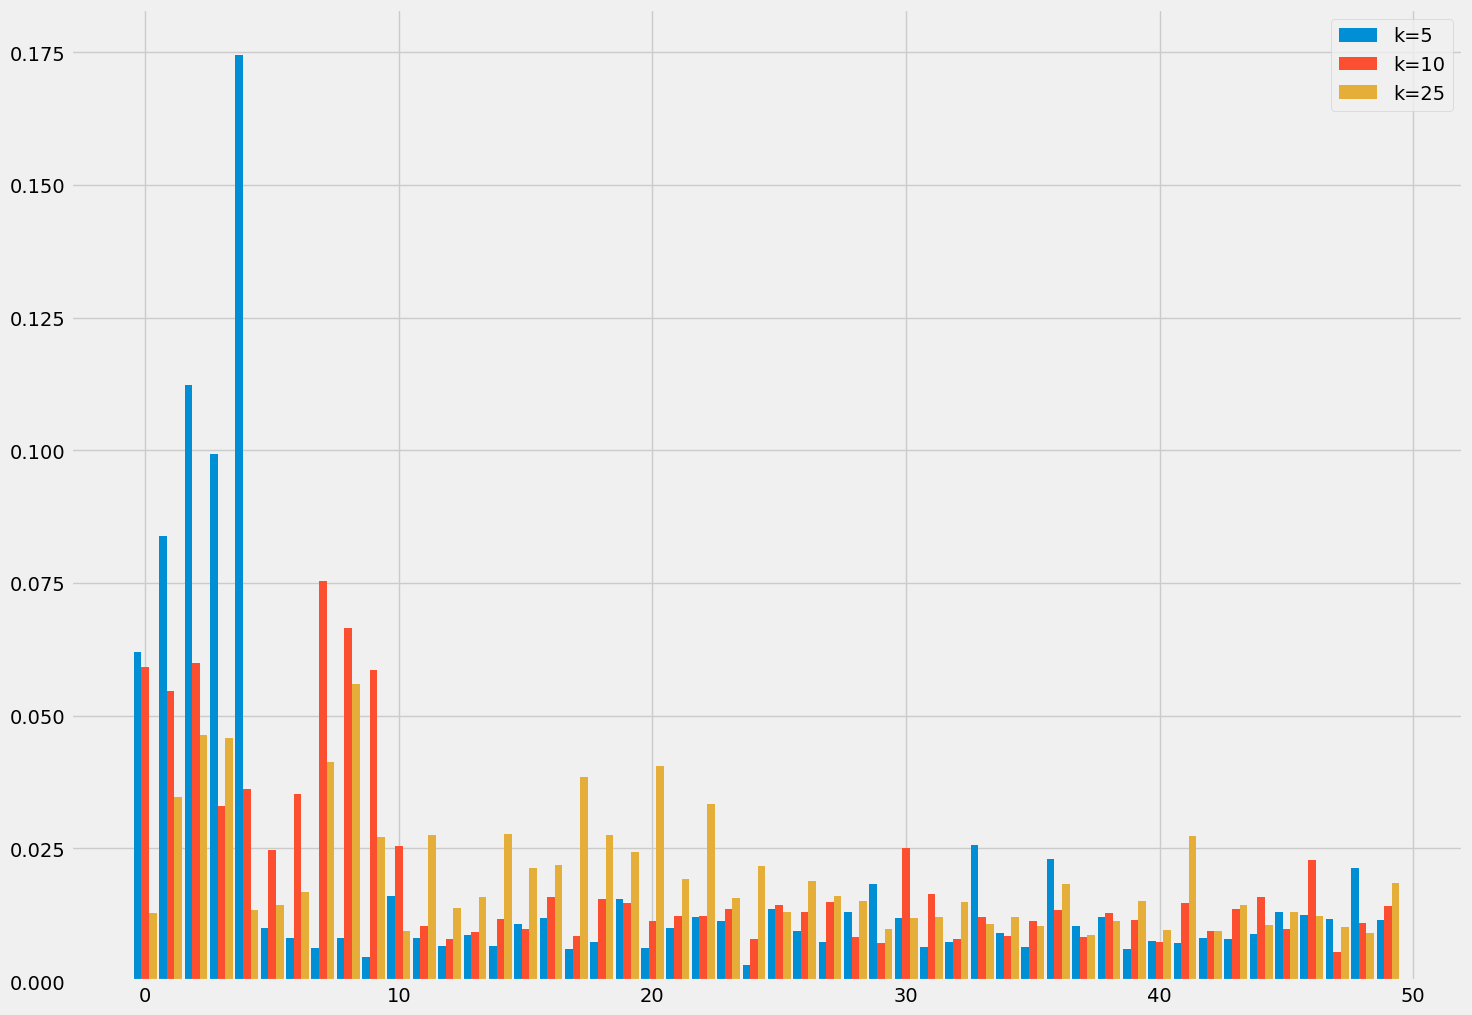

In [38]:
# importance_1
X_axis = np.arange(len(importances_1[0]))
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100   
plt.bar(X_axis-0.3, importances_1[0], 0.3, label = 'k=5')
plt.bar(X_axis, importances_1[1], 0.3, label = 'k=10')
plt.bar(X_axis+0.3, importances_1[2], 0.3, label = 'k=25')
plt.legend()
plt.show()

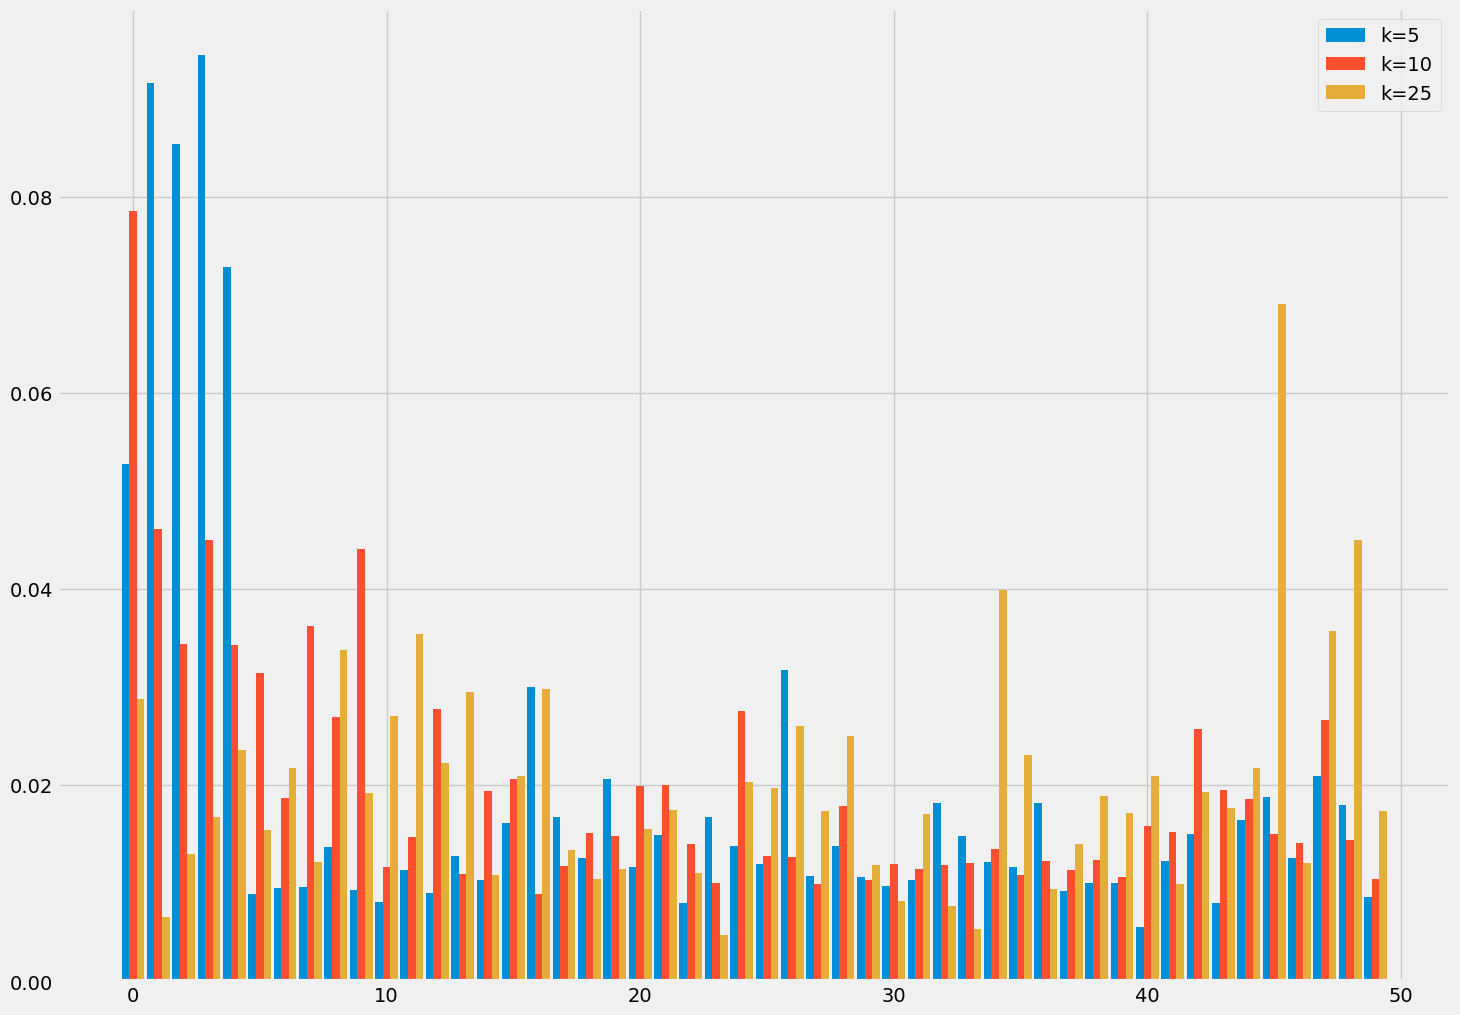

In [40]:
# importance_2
X_axis = np.arange(len(importances_2[0]))
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 
plt.bar(X_axis-0.3, importances_2[0], 0.3, label = 'k=5')
plt.bar(X_axis, importances_2[1], 0.3, label = 'k=10')
plt.bar(X_axis+0.3, importances_2[2], 0.3, label = 'k=25')
plt.legend()
plt.show()

### 2)

In [41]:
ns = [100, 200, 500, 1000]
p = 50
k = 10

In [42]:
importances_1, importances_2 = [], []
rankings_1, rankings_2 = [], []
for k in ks:
    X_1, y_1 = generate_dataset_1(n=n, p=p, k=k)
    X_2, y_2 = generate_dataset_2(n=n, p=p, k=k)
    # classifiers
    rf1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
    rf1.fit(X_1, y_1)
    rf2 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
    rf2.fit(X_2, y_2)
    
    # Random Forests
    importance_1 = rf1.feature_importances_
    importances_1.append(importance_1)
    importance_2 = rf2.feature_importances_
    importances_2.append(importance_2)
    
    # Boruta
    feat_selector1 = BorutaPy(rf1, n_estimators='auto', verbose=2, random_state=47)
    feat_selector2 = BorutaPy(rf2, n_estimators='auto', verbose=2, random_state=47)
    
    feat_selector1.fit(X_1, y_1)
    feat_selector2.fit(X_2, y_2)
    
    rankings_1.append(feat_selector1.ranking_)
    rankings_2.append(feat_selector2.ranking_)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	9 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	10 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	11 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	12 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	13 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	14 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	15 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	16 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
I

Iteration: 	31 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	32 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	33 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	34 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	35 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	36 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	37 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	38 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	39 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	40 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	41 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	42 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	43 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	44 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	45 / 100
Confirmed: 	5
Tentative: 	1
Rejected: 	44
Iteration: 	46 / 100
Confirmed: 	5
Tentative: 	1
Reject

Iteration: 	97 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	98 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	99 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	38
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	50
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	41
Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	41
Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	41
Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	7
Rejected: 	41
Iteration: 	12 / 100
Confirme

Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	36
Iteration: 	42 / 100
Confirmed: 	10
Tent

Iteration: 	56 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	43
Iteration: 	57 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	43
Iteration: 	58 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	43
Iteration: 	59 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	60 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	61 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	62 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	63 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	64 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	65 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	66 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	67 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	68 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	69 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	70 / 100
Confirmed: 	3
Tentative: 	4
Rejected: 	43
Iteration: 	71 / 100
Confirmed: 	3
Tentative: 	4
Reject

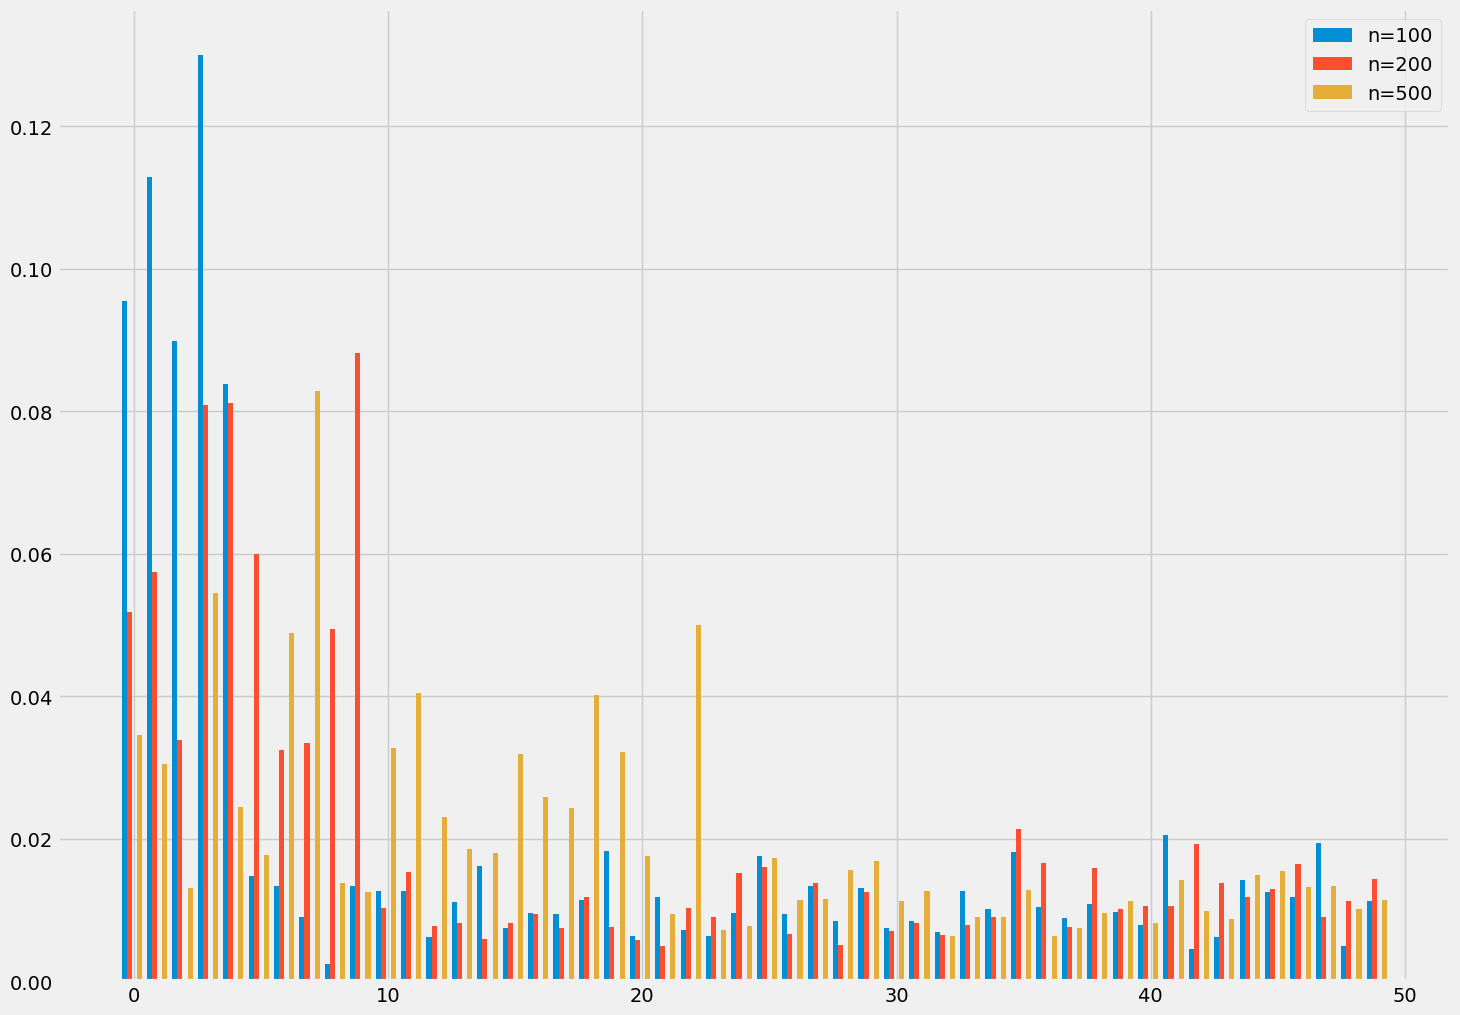

In [44]:
X_axis = np.arange(len(importances_1[0]))
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.bar(X_axis-0.4, importances_1[0], 0.2, label = 'n=100')
plt.bar(X_axis-0.2, importances_1[1], 0.2, label = 'n=200')
plt.bar(X_axis+0.2, importances_1[2], 0.2, label = 'n=500')
#plt.bar(X_axis+0.4, importances_1[3], 0.2, label = 'n=1000')
plt.legend()
plt.show()

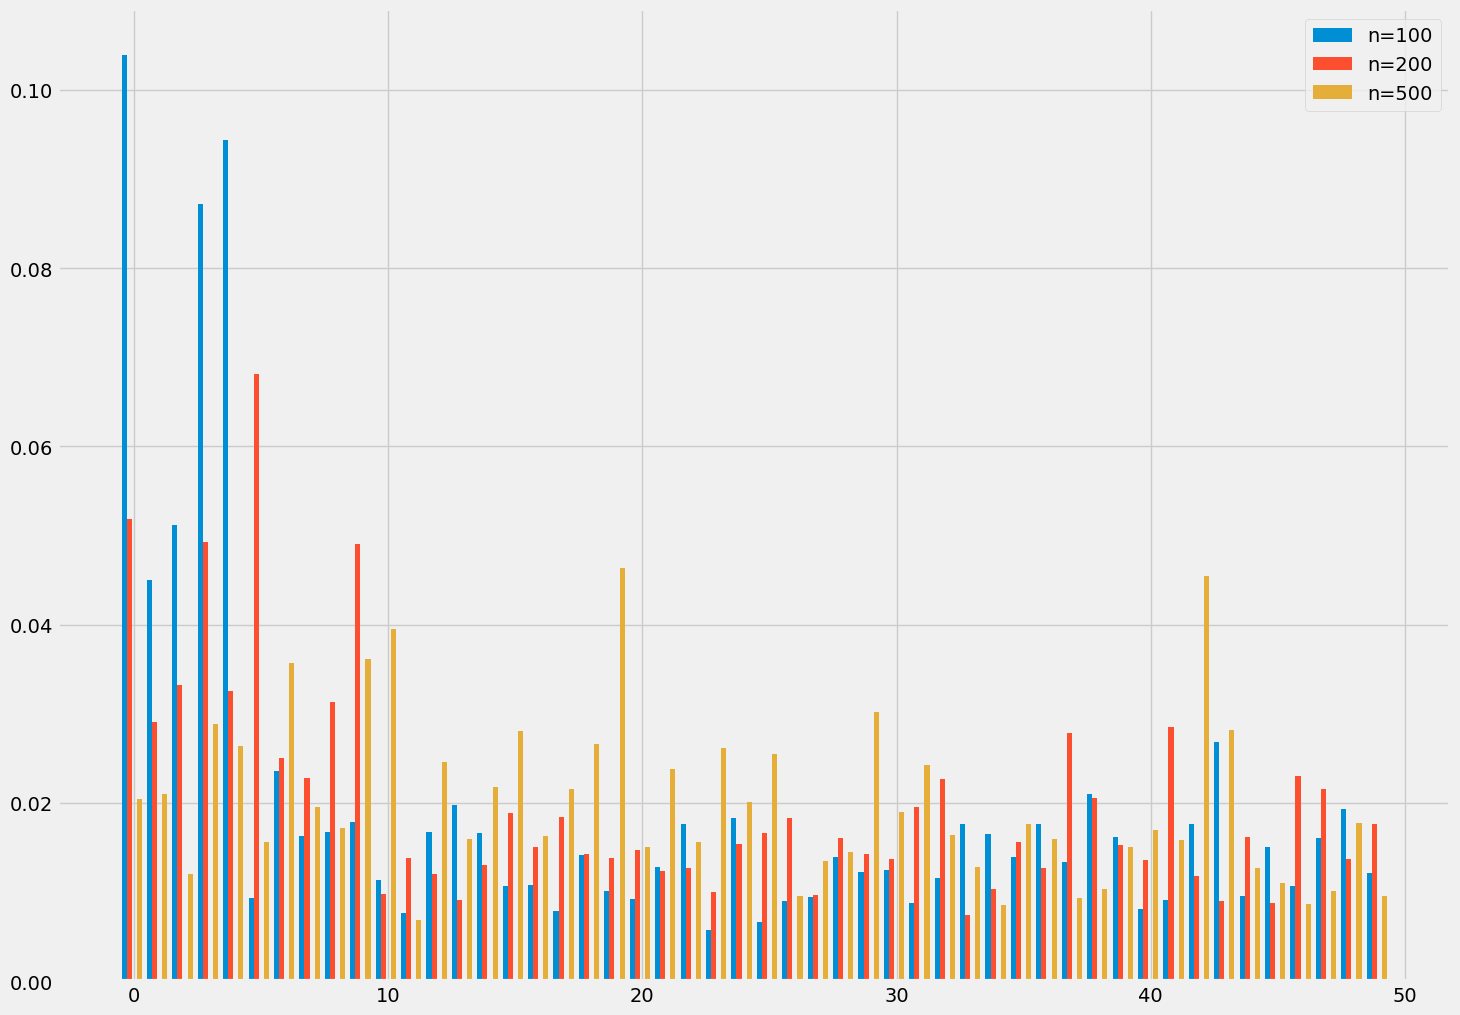

In [46]:
X_axis = np.arange(len(importances_2[0]))
plt.rcParams['figure.figsize'] = [16, 12]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.bar(X_axis-0.4, importances_2[0], 0.2, label = 'n=100')
plt.bar(X_axis-0.2, importances_2[1], 0.2, label = 'n=200')
plt.bar(X_axis+0.2, importances_2[2], 0.2, label = 'n=500')
#plt.bar(X_axis+0.4, importances_2[3], 0.2, label = 'n=1000')
plt.legend()
plt.show()

In [47]:
np.apply_along_axis(np.sum, 0, rankings_1)

array([  3,   3,   9,   3,   5,  16,  25,  34,  72,  42,  29,  29,  87,
        44,  46,  74,  60,  47,  45,  48,  57,  73,  46,  69,  73,  36,
        98,  79,  86,  24,  78,  76, 104,  88,  83,  43,  78,  46,  61,
        66,  70,  56,  80,  79,  32,  54,  49,  61,  79,  46])

In [48]:
np.apply_along_axis(np.sum, 0, rankings_2)

array([ 22,  18,  39,  27,  13,  76,   6,  44,  27,  13,  42,  68,  55,
        70,  88,  47,  65,  87,  70,  80,  62,  67,  86,  67,  57,  92,
        71, 118, 108,  56,  80,  48,  44,  81, 107,  54,  79,  61,  48,
        41, 106,  68,  31,  19,  85,  95,  80,  98,  55,  84])

#### 3)
Repeat data generation process L = 50 times and estimate the probabilities of correct ordering, i.e. compute the fraction of simulations in which the significant variables are selected as relevant or are placed on the top of the ranking list. Take smaller L if simulations are too expensive computationally.

In [50]:
n = 1000
k = 10
p = 100
L = 50

In [51]:
importances_1, importances_2 = [], []
rankings_1, rankings_2 = [], []
for i in range(L):
    X_1, y_1 = generate_dataset_1(n=n, p=p, k=k)
    X_2, y_2 = generate_dataset_2(n=n, p=p, k=k)
    # classifiers
    rf1 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
    rf1.fit(X_1, y_1)
    rf2 = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5, random_state = 47)
    rf2.fit(X_2, y_2)
    
    # Random Forests
    importance_1 = rf1.feature_importances_
    importances_1.append(importance_1)
    importance_2 = rf2.feature_importances_
    importances_2.append(importance_2)
    
    # Boruta
    feat_selector1 = BorutaPy(rf1, n_estimators='auto', verbose=2, random_state=47)
    feat_selector2 = BorutaPy(rf2, n_estimators='auto', verbose=2, random_state=47)
    
    feat_selector1.fit(X_1, y_1)
    feat_selector2.fit(X_2, y_2)
    
    rankings_1.append(feat_selector1.ranking_)
    rankings_2.append(feat_selector2.ranking_)
    
    if i%10 == 0:
        print(f"{i+1}/50")

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3

Iteration: 	22 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	83
Iteration: 	23 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	83
Iteration: 	24 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	83
Iteration: 	25 / 100
Confirmed: 	11
Tentative: 	6
Rejected: 	83
Iteration: 	26 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	27 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	28 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	29 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	30 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	31 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	32 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	33 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	34 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	35 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	36 / 100
Confirmed: 	12
Tentative: 	5
Rejected: 	83
Iteration: 	37 / 100
Confirmed: 	12
Tent

Iteration: 	50 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	51 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	52 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	53 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	54 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	55 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	56 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	57 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	59 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	60 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	61 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	64 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	65 / 100
Confirmed: 	10
Tent

Iteration: 	78 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	79 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	80 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	81 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	82 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	83 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	84 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	85 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	86 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	87 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	88 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	89 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	90 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	91 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	92 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	93 / 100
Confirmed: 	11
Tent

Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	8
Rejected: 	82
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	8
Rejected: 	82
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	8
Rejected: 	82
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	8
Rejected: 	82
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	21 / 100
Confirmed: 	10
Tentativ

Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	49 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	50 / 100
Confirmed: 	10
Tent

Iteration: 	64 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	65 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	66 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	67 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	68 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	69 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	70 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	71 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	72 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	73 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	74 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	75 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	76 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	77 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	78 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	79 / 100
Confirmed: 	11
Tent

Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	35 / 100
Confirmed: 	10
Tent

Iteration: 	49 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	50 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	51 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	52 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	53 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	54 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	55 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	56 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	57 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	59 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	60 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	61 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	64 / 100
Confirmed: 	10
Tent

Iteration: 	78 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	79 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	80 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	81 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	82 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	83 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	84 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	85 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	86 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	87 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	88 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	89 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	90 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	91 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	92 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	93 / 100
Confirmed: 	11
Tent

Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	21 / 100
Confirmed: 	10
Tentativ

Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	49 / 100
Confirmed: 	10
Tent

Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	64 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	65 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	66 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	67 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	68 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	69 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	70 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	71 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	73 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	74 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	75 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	76 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	77 / 100
Confirmed: 	10
Tent

Iteration: 	91 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	92 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	93 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	94 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	95 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	96 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	97 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	98 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	99 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 

Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	32 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	89


BorutaPy finished running.

Iteration: 	33 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	89
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 

Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	31 / 100
Confirmed: 	10
Tent

Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	49 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	50 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	51 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	52 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	53 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	54 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	55 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	56 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	57 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	59 / 100
Confirmed: 	10
Tent

Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	28 / 100
Confirmed: 	10
Tent

Iteration: 	41 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	44 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	45 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	46 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	47 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	48 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	49 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	50 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	51 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	52 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	53 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	54 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	55 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	56 / 100
Confirmed: 	11
Tent

Iteration: 	59 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	60 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	61 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	62 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	63 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	64 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	65 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	66 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	67 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	68 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	69 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	70 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	71 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	72 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	73 / 100
Confirmed: 	13
Tentative: 	1
Rejected: 	86
Iteration: 	74 / 100
Confirmed: 	13
Tent

Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	13
Rejected: 	87
Iteration: 	9 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	87
Iteration: 	10 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	87
Iteration: 	11 / 100
Confirmed: 	6
Tentative: 	7
Rejected: 	87
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	87
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	87
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	87
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	5
Rejected: 	87
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	17 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	18 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	19 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	20 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	21 / 100
Confirmed: 	9
Tentative: 	3
Rejecte

Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	49 / 100
Confirmed: 	10
Tent

Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	

Iteration: 	32 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	33 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	34 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	35 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	36 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	37 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	38 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	39 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	40 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	41 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	44 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	45 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	46 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	47 / 100
Confirmed: 	11
Tent

Iteration: 	88 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	89 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	90 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	87


BorutaPy finished running.

Iteration: 	91 / 100
Confirmed: 	13
Tentative: 	0
Rejected: 	87
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	12 / 100
Co

Iteration: 	84 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	85 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	86 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	87 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	88 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	89 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	90 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	91 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	92 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	93 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	94 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	95 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	96 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	97 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	98 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	99 / 100
Confirmed: 	10
Tent

Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	49 / 100
Confirmed: 	10
Tent

Iteration: 	62 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	63 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	64 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	65 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	66 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	67 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	68 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	69 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	70 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	71 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	72 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	73 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	74 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	75 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	76 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	77 / 100
Confirmed: 	12
Tent

Iteration: 	90 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	91 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	92 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	93 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	94 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	95 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	96 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	97 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	98 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	99 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	87
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5

Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	33 / 100
Confirmed: 	10
Tent

Iteration: 	46 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	47 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	48 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	49 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	50 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	51 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	52 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	53 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	54 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	55 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	56 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	57 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	58 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	59 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	60 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	61 / 100
Confirmed: 	11
Tent

Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	16 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	17 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	18 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	19 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	20 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	21 / 100
Confirmed: 	12
Tentativ

Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	49 / 100
Confirmed: 	10
Tent

Iteration: 	62 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	63 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	64 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	65 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	66 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	67 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	68 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	69 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	70 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	71 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	72 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	73 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	74 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	75 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	76 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	77 / 100
Confirmed: 	11
Tent

Iteration: 	91 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	92 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	93 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	94 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	95 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	96 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	97 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	98 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	99 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	13
Tentative: 	2
Rejected: 	85
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 

Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	73 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	74 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	75 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	76 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	77 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	78 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	79 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	80 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	81 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	82 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	83 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	84 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	85 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	86 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	87 / 100
Confirmed: 	10
Tent

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	7
Rejected: 	85
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	7
Rejected: 	85
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	7
Rejected: 	85
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	7
Rejected: 	85
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	6
Rejected

Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	45 / 100
Confirmed: 	10
Tent

Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	59 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	60 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	61 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	64 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	65 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	66 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	67 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	68 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	69 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	70 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	71 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	73 / 100
Confirmed: 	10
Tent

Iteration: 	86 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	87 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	88 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	89 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	90 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	91 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	92 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	93 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	94 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	95 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	96 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	97 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	98 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration: 	99 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	12
Tentative: 	1
Rejected: 	87
Iteration

Iteration: 	71 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	73 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	74 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	75 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	76 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	77 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	78 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	79 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	80 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	81 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	82 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	83 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	84 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	85 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	86 / 100
Confirmed: 	10
Tent



BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	86
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	15 / 1

Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	44 / 100
Confirmed: 	10
Tent

Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	35 / 100
Confirmed: 	10
Tent

Iteration: 	98 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	99 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	10
Tentative: 	10
Rejected: 	80
Iteration: 	9 / 100
Confirmed: 	10
Tentative: 	10
Rejected: 	80
Iteration: 	10 / 100
Confirmed: 	10
Tentative: 	10
Rejected: 	80
Iteration: 	11 / 100
Confirmed: 	10
Tentative: 	10
Rejected: 	80
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	10
Rejected: 	80
Iteration: 	1

Iteration: 	26 / 100
Confirmed: 	9
Tentative: 	6
Rejected: 	85
Iteration: 	27 / 100
Confirmed: 	9
Tentative: 	6
Rejected: 	85
Iteration: 	28 / 100
Confirmed: 	9
Tentative: 	6
Rejected: 	85
Iteration: 	29 / 100
Confirmed: 	9
Tentative: 	6
Rejected: 	85
Iteration: 	30 / 100
Confirmed: 	9
Tentative: 	6
Rejected: 	85
Iteration: 	31 / 100
Confirmed: 	9
Tentative: 	6
Rejected: 	85
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	5
Rejected: 	85
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	41 / 100
Confirmed: 	10
Tentative:

Iteration: 	54 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	55 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	56 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	57 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	58 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	59 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	60 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	61 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	62 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	63 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	64 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	65 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	66 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	67 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	68 / 100
Confirmed: 	11
Tentative: 	2
Rejected: 	87
Iteration: 	69 / 100
Confirmed: 	11
Tent

Iteration: 	82 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	83 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	84 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	85 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	86 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	87 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	88 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	89 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	90 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	91 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	92 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	93 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	94 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	95 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	96 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	97 / 100
Confirmed: 	11
Tent

Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	90
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	3
Rejected: 	90
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	17 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	18 / 100
Confirmed: 	8
Tentative: 	2
Rejected: 	90
Iteration: 	19 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	90
Iteration: 	20 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	90
Iteration: 	21 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	90
Iteration: 	22 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	90
Iteration: 	23 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	90
Iteration: 	24 / 100
Confirmed: 	9
Tentative: 	1
Rejected: 	90
Iteration: 	25 / 100
Confirmed: 	9
Tentative: 	1
Reject

Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	4
Tentative: 	8
Rejected: 	88
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	16 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	17 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	18 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	19 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	20 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	21 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	22 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	23 / 100
Confirmed: 	9
Tentative: 	3
Rejecte

Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	39 / 100
Confirmed: 	10
Tent

Iteration: 	52 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	53 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	54 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	55 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	56 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	57 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	59 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	60 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	61 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	64 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	65 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	66 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	67 / 100
Confirmed: 	10
Tent

Iteration: 	80 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	81 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	82 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	83 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	84 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	85 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	86 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	87 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	88 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	89 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	90 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	91 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	92 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	93 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	94 / 100
Confirmed: 	12
Tentative: 	2
Rejected: 	86
Iteration: 	95 / 100
Confirmed: 	12
Tent

Iteration: 	8 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	9 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	10 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	11 / 100
Confirmed: 	8
Tentative: 	6
Rejected: 	86
Iteration: 	12 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	13 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	14 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	15 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	16 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	17 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	18 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	19 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	20 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	21 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	4
Rejected: 	86
Iteration: 	23 / 100
Confirmed: 	10
Tentative:

Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	45 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	46 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	47 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	48 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	49 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	50 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	51 / 100
Confirmed: 	10
Tent

Iteration: 	66 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	67 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	68 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	69 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	70 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	71 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	73 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	74 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	75 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	76 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	77 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	78 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	79 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	80 / 100
Confirmed: 	10
Tentative: 	3
Rejected: 	87
Iteration: 	81 / 100
Confirmed: 	10
Tent

Iteration: 	94 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	95 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	96 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	97 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	98 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	99 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	11
Tentative: 	1
Rejected: 	88
Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	14
Rejected: 	86
Iteration: 	9 / 1

Iteration: 	22 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	23 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	24 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	25 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	26 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	27 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	28 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	29 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	37 / 100
Confirmed: 	10
Tent

Iteration: 	72 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	73 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	74 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	75 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	76 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	77 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	78 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	79 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	80 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	81 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	82 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	83 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	84 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	85 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	86 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	87 / 100
Confirmed: 	11
Tent

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	12 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	14 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	15 / 100
Confirmed: 	8
Tentative: 	4
Rejected: 	88
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejecte

Iteration: 	30 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	31 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	32 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	33 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	34 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	35 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	36 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	37 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	38 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	39 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	40 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	41 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	42 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	43 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	44 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	45 / 100
Confirmed: 	10
Tent

Iteration: 	58 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	59 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	60 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	61 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	62 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	63 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	64 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	65 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	66 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	67 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	68 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	69 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	70 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	71 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	1
Rejected: 	89
Iteration: 	73 / 100
Confirmed: 	10
Tent

Iteration: 	77 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	78 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	79 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	80 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	81 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	82 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	83 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	84 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	85 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	86 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	87 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	88 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	89 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	90 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	91 / 100
Confirmed: 	13
Tentative: 	5
Rejected: 	82
Iteration: 	92 / 100
Confirmed: 	13
Tent

Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	12
Rejected: 	88
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	5
Rejected: 	88
Iteration: 	16 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	17 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	18 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	19 / 100
Confirmed: 	9
Tentative: 	3
Rejected: 	88
Iteration: 	20 / 100
Confirmed: 	9
Tentative: 	3
Rejecte

Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	89
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	89
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	89
Iteration: 	17 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	89
Iteration: 	18 / 100
Confirmed: 	7
Tentative: 	4
Rejected: 	89
Iteration: 	19 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	20 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	21 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	22 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	23 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	24 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	25 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	26 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	27 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	28 / 100
Confirmed: 	8
Tentative: 	3
Rejected: 	89
Iteration: 	29 / 100
Confirmed: 	8
Tentative: 	3
Reject

Iteration: 	44 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	45 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	46 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	47 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	48 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	49 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	50 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	51 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	52 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	53 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	54 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	55 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	56 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	57 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	58 / 100
Confirmed: 	11
Tentative: 	3
Rejected: 	86
Iteration: 	59 / 100
Confirmed: 	11
Tent

Iteration: 	72 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	73 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	74 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	75 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	76 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	77 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	78 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	79 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	80 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	81 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	82 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	83 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	84 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	85 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	86 / 100
Confirmed: 	10
Tentative: 	2
Rejected: 	88
Iteration: 	87 / 100
Confirmed: 	10
Tent

Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	100
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	10 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	11 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	12 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	13 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	14 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	15 / 100
Confirmed: 	11
Tentative: 	5
Rejected: 	84
Iteration: 	16 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	85
Iteration: 	17 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	85
Iteration: 	18 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	85
Iteration: 	19 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	85
Iteration: 	20 / 100
Confirmed: 	11
Tentative: 	4
Rejected: 	85
Iteration: 	21 / 100
Confirmed: 	11
Tentativ

#### Plot of mean importances for each variable for both datasets

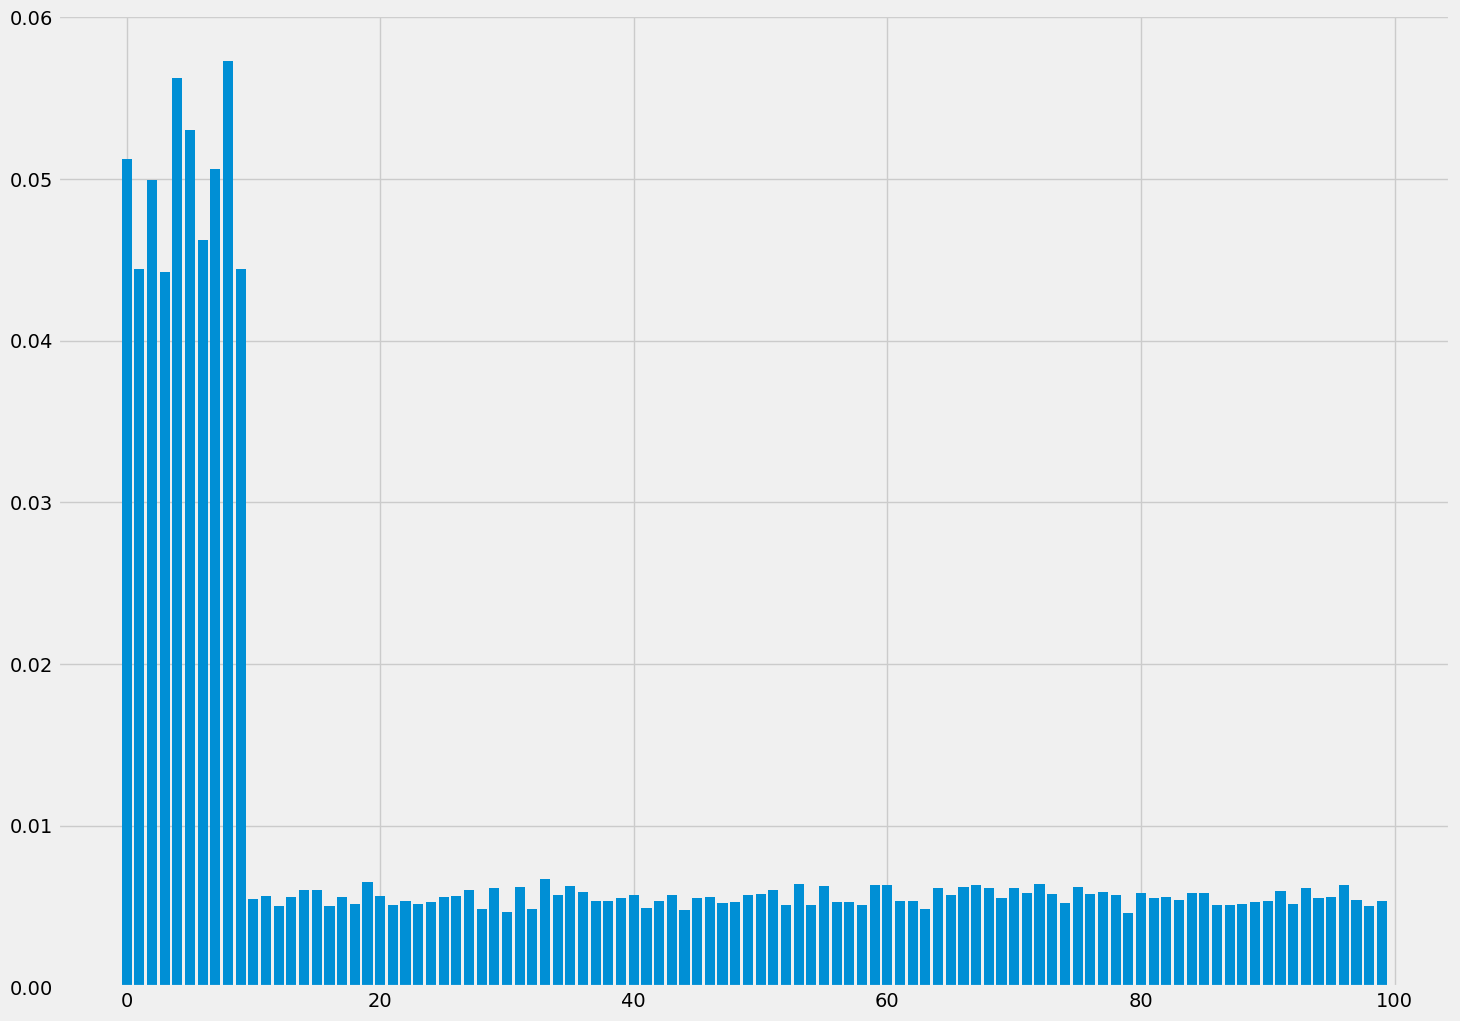

In [52]:
means_1 = np.apply_along_axis(np.mean, 0, importances_1)
plt.bar(range(len(means_1)), means_1)
plt.show()

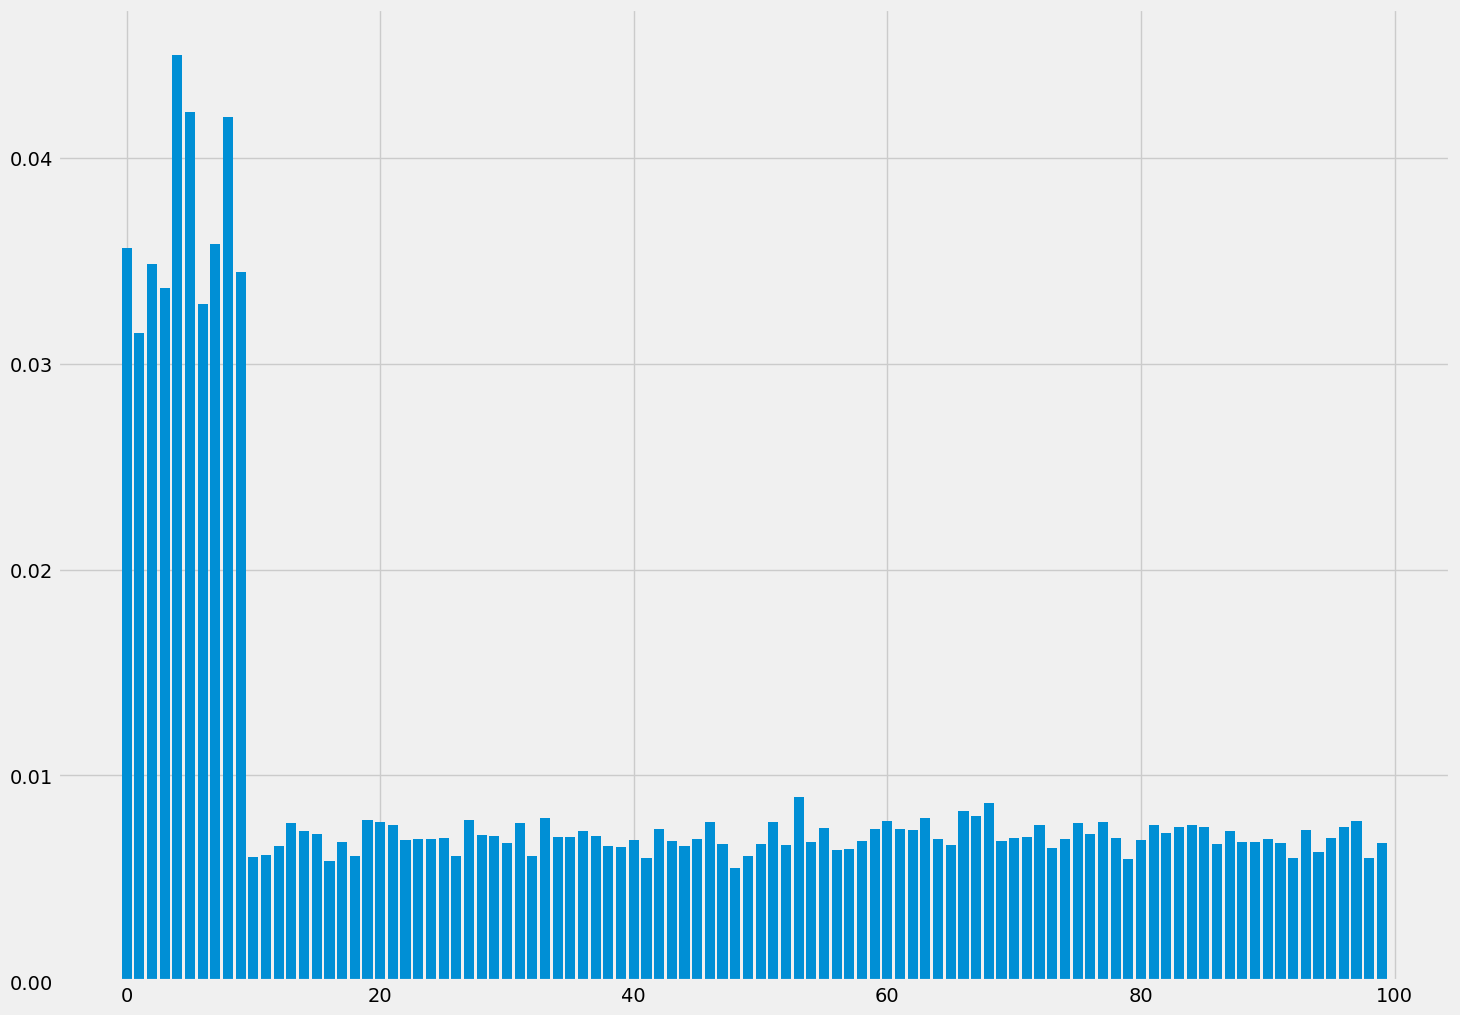

In [53]:
means_2 = np.apply_along_axis(np.mean, 0, importances_2)
plt.bar(range(len(means_2)), means_2)
plt.show()

#### Boruta mean rankings for both datasets

In [56]:
np.apply_along_axis(np.mean, 0, rankings_1)

array([ 1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,  1.  ,
        1.  , 42.6 , 46.5 , 42.08, 48.48, 47.78, 43.  , 44.74, 43.44,
       41.12, 39.24, 47.52, 50.48, 45.74, 47.  , 49.78, 43.08, 40.68,
       42.  , 46.12, 38.62, 52.76, 47.58, 48.08, 43.92, 46.36, 40.54,
       39.74, 42.88, 53.72, 45.54, 44.86, 43.12, 46.62, 51.3 , 43.2 ,
       43.54, 41.96, 46.86, 45.7 , 40.78, 42.26, 35.64, 47.78, 41.42,
       48.68, 45.5 , 50.26, 45.94, 44.12, 37.26, 39.08, 45.2 , 44.64,
       48.52, 43.6 , 46.32, 49.52, 47.44, 44.2 , 48.72, 39.7 , 45.04,
       43.66, 45.38, 50.22, 43.2 , 43.62, 42.6 , 39.86, 50.12, 51.78,
       44.68, 48.1 , 50.44, 43.66, 40.82, 57.26, 50.54, 45.14, 41.94,
       53.58, 43.44, 48.9 , 49.36, 37.16, 46.5 , 47.96, 45.3 , 48.58,
       41.88])

In [57]:
np.apply_along_axis(np.mean, 0, rankings_2)

array([ 1.04,  1.02,  1.  ,  1.06,  1.  ,  1.  ,  1.08,  1.  ,  1.  ,
        1.  , 47.42, 47.6 , 41.7 , 38.3 , 51.48, 42.92, 45.68, 49.68,
       48.46, 38.38, 42.88, 47.32, 44.1 , 44.9 , 40.44, 51.12, 41.2 ,
       36.78, 41.12, 45.5 , 45.66, 43.88, 45.6 , 50.04, 55.24, 47.84,
       34.34, 50.46, 51.94, 46.12, 51.66, 46.48, 42.38, 50.22, 42.34,
       43.48, 43.56, 48.66, 41.56, 48.14, 43.62, 44.94, 47.1 , 39.32,
       46.8 , 54.22, 45.54, 42.8 , 44.74, 38.48, 40.  , 45.14, 36.16,
       45.46, 44.46, 42.24, 47.9 , 46.76, 44.22, 50.94, 43.72, 37.9 ,
       43.26, 46.94, 44.54, 47.62, 40.78, 38.62, 43.9 , 51.7 , 49.46,
       44.88, 41.4 , 45.2 , 41.6 , 36.08, 51.56, 41.28, 40.92, 47.84,
       46.22, 47.04, 44.48, 41.26, 46.16, 50.52, 38.98, 36.34, 46.12,
       45.36])